In [1]:
import numpy as np
import matplotlib.pyplot  as plt
# import streamlit
import ex1


demonstrations:

In [11]:
kneset25_df = ex1.load_data("knesset_25.xlsx")

In [8]:
kneset25_df

,city_name,ballot_code,party_avoda,party_shahar_kalkali_hadash,party_bayit_yehudi,party_agudat_israel,party_daled,party_vavmem,party_shahar_koach_hevrati,party_kama,...,party_tze'irim_bo'arim,party_manhigut_hevratit,party_kol_hasviva_vehachai,party_halev_hayehudi,party_seder_chadash,party_kol,party_beometz_bishvilech,party_kavod_umasoret,party_shas,party_daat_tov_vera
0,אבו גווייעד שבט,3.1,0,0,0,0,4,21,0,0,...,0,0,0,0,0,0,0,0,0,2
1,אבו גווייעד שבט,3.2,1,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,1
2,אבו גווייעד שבט,3.3,0,0,0,0,0,12,0,0,...,0,0,0,0,0,0,0,0,2,0
3,אבו גווייעד שבט,3.4,0,0,0,0,0,3,0,0,...,1,0,0,0,0,0,0,0,2,0
4,אבו גוש,1.1,1,0,0,0,171,43,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12540,תקוע,3.0,4,3,66,1,0,1,0,0,...,1,0,0,0,0,0,6,0,12,0
12541,תקוע,4.0,6,3,66,3,0,0,0,0,...,0,0,0,1,0,0,1,0,3,0
12542,תראבין אצאנע שבט,1.0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
12543,תראבין אצאנעישוב,1.0,1,0,0,0,6,1,0,0,...,0,0,0,0,0,0,1,0,1,0


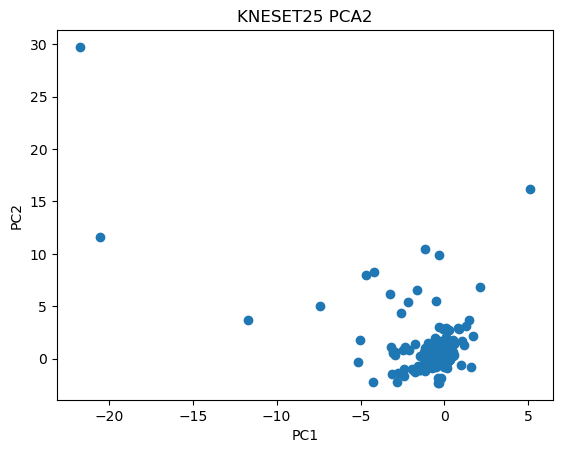

In [9]:
# Aggregate the data so that each row represents a city, and each column represents the total number of votes obtained by each party.
agg_df = ex1.group_and_aggregate_data(kneset25_df.drop(['ballot_code'],axis='columns'),'city_name',"sum")
# Remove the data for parties that received less than 1000 total votes.
filtered_df = ex1.remove_sparse_columns(agg_df,1000)
#filtered_df
# PCA 2D
pca2_df = ex1.dimensionality_reduction(filtered_df,2,['city_name'])
plt.scatter(pca2_df['PC1'], pca2_df['PC2'])
plt.title("KNESET25 PCA2")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

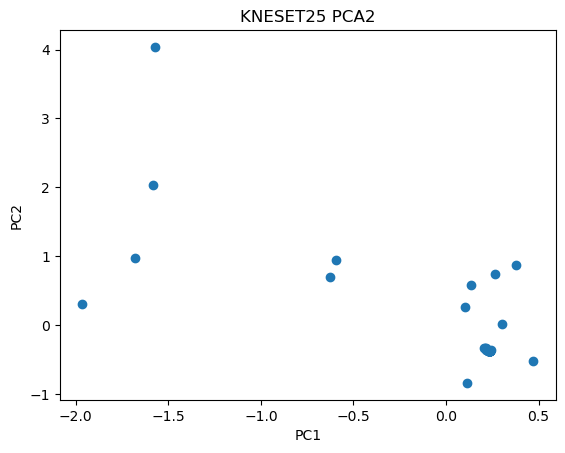

In [10]:
#transpose the data
agg_df = ex1.group_and_aggregate_data(kneset25_df.drop(['ballot_code'],axis='columns'),'city_name',"sum")

df_transposed = agg_df.set_index('city_name').T
df_transposed = df_transposed.reset_index()
df_transposed.rename(columns={'index': 'party_name'}, inplace=True)
# df_transposed

# Remove the data for parties that received less than 1000 total votes.
filtered_df = ex1.remove_sparse_columns(df_transposed,1000)
# filtered_df


# PCA 2D
pca2_df = ex1.dimensionality_reduction(filtered_df,2,['party_name'])

# Ensure PC1 and PC2 are real numbers
pca2_df['PC1'] = pca2_df['PC1'].apply(lambda x: x.real if np.iscomplex(x) else x)
pca2_df['PC2'] = pca2_df['PC2'].apply(lambda x: x.real if np.iscomplex(x) else x)

plt.scatter(pca2_df['PC1'], pca2_df['PC2'])
plt.title("KNESET25 PCA2")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()